## Problem Statement

The target feature is Accident_severity which is a multi-class variable. The task is to classify this variable based on the other 31 features step-by-step by going through each day's task. Your metric for evaluation will be f1-score

## Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

## Data Gathering

In [3]:
df=pd.read_csv('RTA Dataset.csv')
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


## Exploratory Data Analysis

In [3]:
df.shape

(12316, 32)

In [4]:
df.sample()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
2620,18:16:00,Wednesday,31-50,Male,NaN,Owner,Below 1yr,NaN,Owner,NaN,...,Going straight,Driver or rider,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury


In [5]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [7]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [9]:
df.describe(include=['O']).T

,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883


In [8]:
duplicates=df.duplicated()
duplicates.unique()

#no duplicates value in dataset

array([False])

In [9]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

#### F1-Time

In [10]:
df['Time']

0        17:02:00
1        17:02:00
2        17:02:00
3        01:06:00
4        01:06:00
           ...   
12311    16:15:00
12312    18:00:00
12313    13:55:00
12314    13:55:00
12315    13:55:00
Name: Time, Length: 12316, dtype: object

In [11]:
df.drop('Time',axis=1,inplace=True) #as we know time is not affecting the accident so dropping time column

#### F2-Day_of_week

In [12]:
df['Day_of_week']
df['Day_of_week'].value_counts()

Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: Day_of_week, dtype: int64

<AxesSubplot:xlabel='Day_of_week', ylabel='count'>

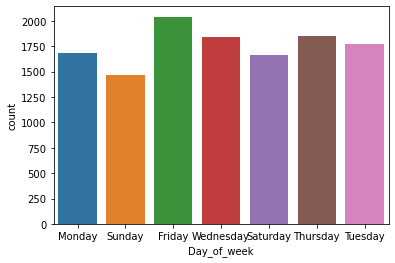

In [13]:
sns.countplot(df['Day_of_week'])

In [14]:
df.drop('Day_of_week',axis=1,inplace=True)

#### F3-Age_band_of_driver

In [15]:
df['Age_band_of_driver']

0          18-30
1          31-50
2          18-30
3          18-30
4          18-30
          ...   
12311      31-50
12312    Unknown
12313    Over 51
12314      18-30
12315      18-30
Name: Age_band_of_driver, Length: 12316, dtype: object

In [16]:
df['Age_band_of_driver'].unique()

array(['18-30', '31-50', 'Under 18', 'Over 51', 'Unknown'], dtype=object)

In [17]:
df['Age_band_of_driver'].value_counts()

18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: Age_band_of_driver, dtype: int64

<AxesSubplot:xlabel='Age_band_of_driver', ylabel='count'>

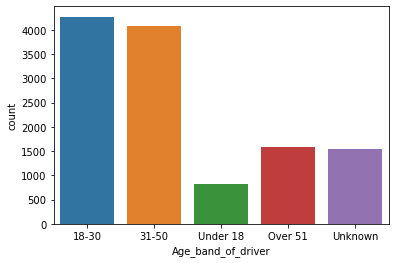

In [18]:
sns.countplot(df['Age_band_of_driver'])

#### F4-Sex_of_driver

In [19]:
df['Sex_of_driver'].value_counts()

Male       11437
Female       701
Unknown      178
Name: Sex_of_driver, dtype: int64

In [20]:
df['Sex_of_driver'].isnull().sum()

0

<AxesSubplot:xlabel='Sex_of_driver', ylabel='count'>

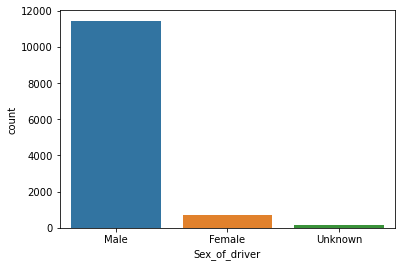

In [21]:
sns.countplot(df['Sex_of_driver'])

#### F5-Educational_level

In [22]:
df['Educational_level'].value_counts()

Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: Educational_level, dtype: int64

In [23]:
(df['Educational_level'].isnull().sum()/len(df.index))*100

6.016563819421891

In [24]:
df['Educational_level'].fillna('Unknown',inplace=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Above high school'),
  Text(1, 0, 'Junior high school'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Elementary school'),
  Text(4, 0, 'High school'),
  Text(5, 0, 'Illiterate'),
  Text(6, 0, 'Writing & reading')])

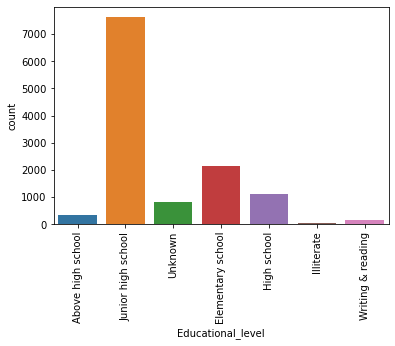

In [25]:
sns.countplot(df['Educational_level'])
plt.xticks(rotation=90)

#### F6-Vehicle_driver_relation

In [26]:
df['Vehicle_driver_relation'].value_counts()

Employee    9627
Owner       1973
Other        123
Unknown       14
Name: Vehicle_driver_relation, dtype: int64

In [27]:
df['Vehicle_driver_relation'].isnull().sum()

579

In [28]:
df['Vehicle_driver_relation'].fillna('Unknown',inplace=True)

<AxesSubplot:xlabel='Vehicle_driver_relation', ylabel='count'>

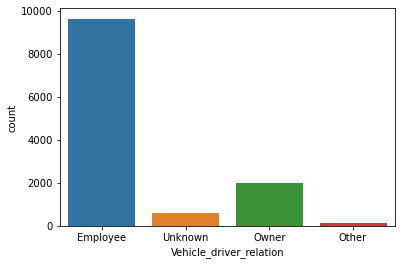

In [29]:
sns.countplot(df['Vehicle_driver_relation'])

#### F7-Driving_experience

In [30]:
df['Driving_experience'].value_counts()

5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: Driving_experience, dtype: int64

In [31]:
df['Driving_experience'].isnull().sum()

829

In [32]:
df['Driving_experience'].fillna('Unknown',inplace=True)

<AxesSubplot:xlabel='Driving_experience', ylabel='count'>

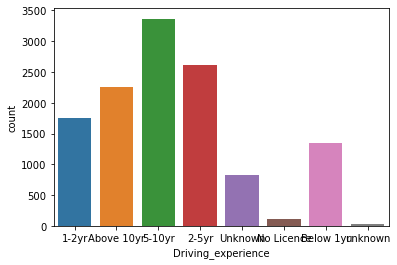

In [33]:
sns.countplot(df['Driving_experience'])

#### F8-Type_of_vehicle

In [34]:
df['Type_of_vehicle'].value_counts()

Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: Type_of_vehicle, dtype: int64

In [35]:
df.drop('Type_of_vehicle',axis=1,inplace=True)

#### F9-Owner_of_vehicle

In [36]:
df['Owner_of_vehicle'].value_counts()

Owner           10459
Governmental     1041
Organization      312
Other              22
Name: Owner_of_vehicle, dtype: int64

<AxesSubplot:xlabel='Owner_of_vehicle', ylabel='count'>

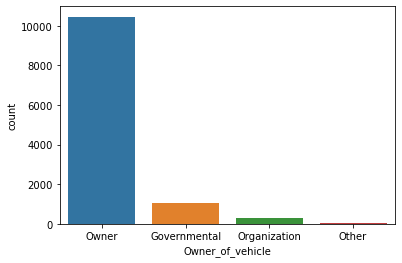

In [37]:
sns.countplot(df['Owner_of_vehicle'])

In [38]:
df.drop('Owner_of_vehicle',axis=1,inplace=True)

#### F10-Service_year_of_vehicle

In [39]:
df['Service_year_of_vehicle'].value_counts()

Unknown       2883
2-5yrs        1792
Above 10yr    1324
5-10yrs       1280
1-2yr          827
Below 1yr      282
Name: Service_year_of_vehicle, dtype: int64

<AxesSubplot:xlabel='Service_year_of_vehicle', ylabel='count'>

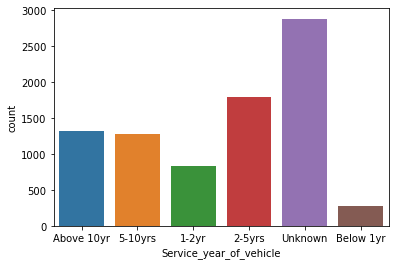

In [40]:
sns.countplot(df['Service_year_of_vehicle'])

In [41]:
df.drop('Service_year_of_vehicle',axis=1,inplace=True)

#### F11-Defect_of_vehicle

In [42]:
df['Defect_of_vehicle'].value_counts()

No defect    7777
7              76
5              36
Name: Defect_of_vehicle, dtype: int64

In [43]:
df.drop('Defect_of_vehicle',axis=1,inplace=True)

#### F12-Area_accident_occured

In [44]:
df['Area_accident_occured'].value_counts()

Other                              3819
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Recreational areas                    1
Name: Area_accident_occured, dtype: int64

In [45]:
df.drop('Area_accident_occured',axis=1,inplace=True)

#### F13-Lanes_or_Medians

In [46]:
df['Lanes_or_Medians'].value_counts()

Two-way (divided with broken lines road marking)    4411
Undivided Two way                                   3796
other                                               1660
Double carriageway (median)                         1020
One way                                              845
Two-way (divided with solid lines road marking)      142
Unknown                                               57
Name: Lanes_or_Medians, dtype: int64

In [47]:
df['Lanes_or_Medians'].isnull().sum()

385

In [48]:
df['Lanes_or_Medians'].fillna('Unknown',inplace=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Undivided Two way'),
  Text(2, 0, 'other'),
  Text(3, 0, 'Double carriageway (median)'),
  Text(4, 0, 'One way'),
  Text(5, 0, 'Two-way (divided with solid lines road marking)'),
  Text(6, 0, 'Two-way (divided with broken lines road marking)')])

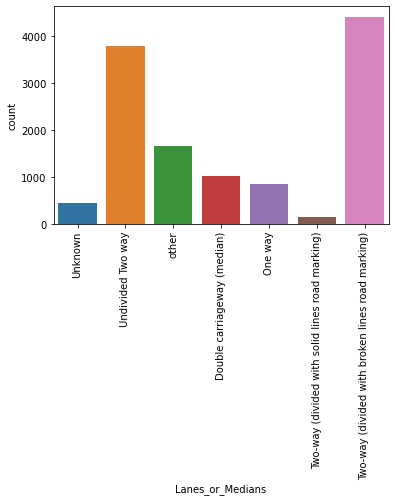

In [49]:
sns.countplot(df['Lanes_or_Medians'])
plt.xticks(rotation=90)

#### F14-Road_allignment

In [50]:
df['Road_allignment'].value_counts()

Tangent road with flat terrain                   10459
Tangent road with mild grade and flat terrain      501
Steep grade downward with mountainous terrain      429
Tangent road with mountainous terrain and          396
Gentle horizontal curve                            163
Escarpments                                        113
Sharp reverse curve                                 57
Tangent road with rolling terrain                   37
Steep grade upward with mountainous terrain         19
Name: Road_allignment, dtype: int64

In [51]:
df.drop('Road_allignment',axis=1,inplace=True)

#### F15-Types_of_Junction

In [52]:
df['Types_of_Junction'].value_counts()

Y Shape        4543
No junction    3837
Crossing       2177
Other           445
Unknown         191
O Shape         164
T Shape          60
X Shape          12
Name: Types_of_Junction, dtype: int64

In [53]:
df['Types_of_Junction'].isnull().sum()

887

In [54]:
df['Types_of_Junction'].fillna('Unknown',inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'No junction'),
  Text(1, 0, 'Y Shape'),
  Text(2, 0, 'Crossing'),
  Text(3, 0, 'O Shape'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Unknown'),
  Text(6, 0, 'T Shape'),
  Text(7, 0, 'X Shape')])

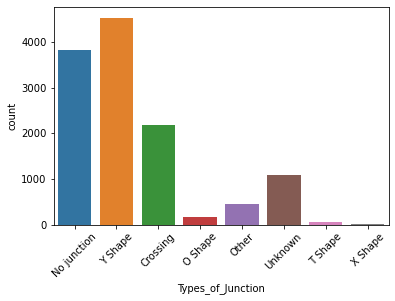

In [55]:
sns.countplot(df['Types_of_Junction'])
plt.xticks(rotation=45)

#### F16-Road_surface_type

In [56]:
df['Road_surface_type'].value_counts()

Asphalt roads                       11296
Earth roads                           358
Gravel roads                          242
Other                                 167
Asphalt roads with some distress       81
Name: Road_surface_type, dtype: int64

In [57]:
df['Road_surface_type'].isnull().sum()

172

In [58]:
df['Road_surface_type'].fillna('Unknown',inplace=True)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Asphalt roads'),
  Text(1, 0, 'Earth roads'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Asphalt roads with some distress'),
  Text(4, 0, 'Gravel roads'),
  Text(5, 0, 'Other')])

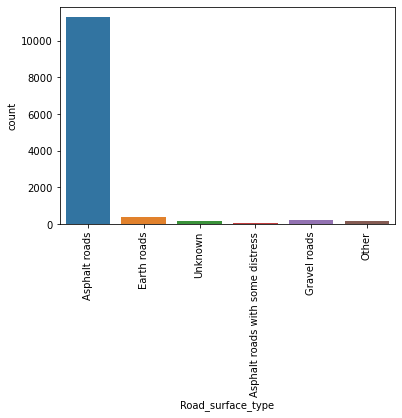

In [59]:
sns.countplot(df['Road_surface_type'])
plt.xticks(rotation=90)

#### F17-Light_conditions

In [60]:
df['Light_conditions'].value_counts()

Daylight                   8798
Darkness - lights lit      3286
Darkness - no lighting      192
Darkness - lights unlit      40
Name: Light_conditions, dtype: int64

In [61]:
df['Light_conditions'].isnull().sum()

0

#### F18-Weather_conditions

In [62]:
df['Weather_conditions'].value_counts()

Normal               10063
Raining               1331
Other                  296
Unknown                292
Cloudy                 125
Windy                   98
Snow                    61
Raining and Windy       40
Fog or mist             10
Name: Weather_conditions, dtype: int64

In [63]:
df['Weather_conditions'].isnull().sum()

0

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Raining'),
  Text(2, 0, 'Raining and Windy'),
  Text(3, 0, 'Cloudy'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Windy'),
  Text(6, 0, 'Snow'),
  Text(7, 0, 'Unknown'),
  Text(8, 0, 'Fog or mist')])

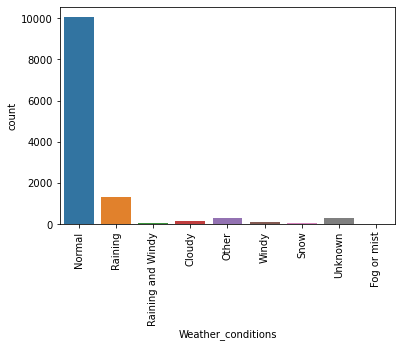

In [64]:
sns.countplot(df['Weather_conditions'])
plt.xticks(rotation=90)

#### F19-Type_of_collision

In [65]:
df['Type_of_collision'].value_counts()

Vehicle with vehicle collision             8774
Collision with roadside objects            1786
Collision with pedestrians                  896
Rollover                                    397
Collision with animals                      171
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
Unknown                                      14
With Train                                    9
Name: Type_of_collision, dtype: int64

In [66]:
df['Type_of_collision'].isnull().sum()

155

In [67]:
df['Type_of_collision'].fillna('Unknown',inplace=True)

#### F20-Number_of_vehicles_involved

In [68]:
df['Number_of_vehicles_involved'].value_counts()

2    8340
1    1996
3    1568
4     363
6      42
7       7
Name: Number_of_vehicles_involved, dtype: int64

In [69]:
df['Number_of_vehicles_involved'].isnull().sum()

0

<AxesSubplot:xlabel='Number_of_vehicles_involved', ylabel='Density'>

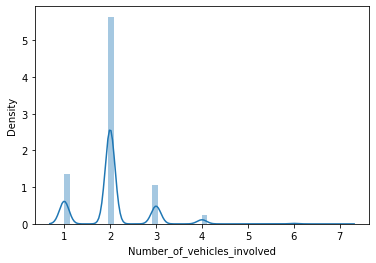

In [103]:
sns.distplot(df['Number_of_vehicles_involved'])

#### F21-Number_of_casualties

In [71]:
df['Number_of_casualties'].value_counts()

1    8397
2    2290
3     909
4     394
5     207
6      89
7      22
8       8
Name: Number_of_casualties, dtype: int64

In [72]:
df['Number_of_casualties'].isnull().sum()

0

<AxesSubplot:xlabel='Number_of_casualties', ylabel='Density'>

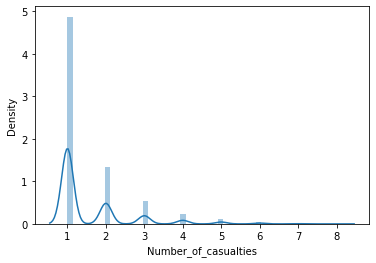

In [104]:
sns.distplot(df['Number_of_casualties'])

#### F22-Vehicle_movement

In [74]:
df['Vehicle_movement'].value_counts()

Going straight         8158
Moving Backward         985
Other                   937
Reversing               563
Turnover                489
Getting off             339
Entering a junction     193
Overtaking               96
Unknown                  88
Stopping                 61
U-Turn                   50
Waiting to go            39
Parked                   10
Name: Vehicle_movement, dtype: int64

In [75]:
df['Vehicle_movement'].isnull().sum()

308

In [76]:
df['Vehicle_movement'].fillna('Unknown',inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Going straight'),
  Text(1, 0, 'U-Turn'),
  Text(2, 0, 'Moving Backward'),
  Text(3, 0, 'Turnover'),
  Text(4, 0, 'Waiting to go'),
  Text(5, 0, 'Getting off'),
  Text(6, 0, 'Reversing'),
  Text(7, 0, 'Unknown'),
  Text(8, 0, 'Parked'),
  Text(9, 0, 'Stopping'),
  Text(10, 0, 'Overtaking'),
  Text(11, 0, 'Other'),
  Text(12, 0, 'Entering a junction')])

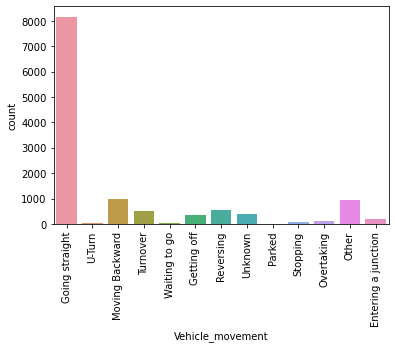

In [77]:
sns.countplot(df['Vehicle_movement'])
plt.xticks(rotation=90)

#### F23-Casualty_class

In [78]:
df['Casualty_class'].value_counts()

Driver or rider    4944
na                 4443
Pedestrian         1649
Passenger          1280
Name: Casualty_class, dtype: int64

In [79]:
df['Casualty_class'].isnull().sum()

0

<AxesSubplot:xlabel='Casualty_class', ylabel='count'>

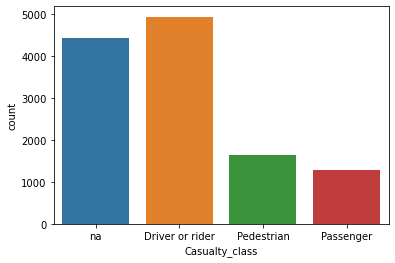

In [80]:
sns.countplot(df['Casualty_class'])

#### F24-Sex_of_casualty

In [81]:
df['Sex_of_casualty'].value_counts()

Male      5253
na        4443
Female    2620
Name: Sex_of_casualty, dtype: int64

In [82]:
df['Sex_of_casualty'].isnull().sum()

0

In [83]:
df.drop('Sex_of_casualty',axis=1,inplace=True)

#### F25-Age_band_of_casualty

In [84]:
df['Age_band_of_casualty'].value_counts()

na          4443
18-30       3145
31-50       2455
Under 18    1035
Over 51      994
5            244
Name: Age_band_of_casualty, dtype: int64

In [85]:
df['Age_band_of_casualty'].isnull().sum()

0

In [86]:
df.drop('Age_band_of_casualty',axis=1,inplace=True)

#### F26-Casualty_severity

In [87]:
df['Casualty_severity'].value_counts()

3     7076
na    4443
2      771
1       26
Name: Casualty_severity, dtype: int64

In [88]:
df['Casualty_severity'].isnull().sum()

0

In [89]:
df.drop('Casualty_severity',axis=1,inplace=True)

#### F27-Work_of_casuality

In [90]:
df['Work_of_casuality'].value_counts()

Driver           5903
Self-employed    2044
Employee          553
Other             463
Student           103
Unemployed         33
Unknown            19
Name: Work_of_casuality, dtype: int64

In [91]:
df.drop('Work_of_casuality',axis=1,inplace=True)

#### F28-Fitness_of_casuality

In [92]:
df['Fitness_of_casuality'].value_counts()

Normal          9608
NormalNormal      19
Deaf              18
Other             18
Blind             18
Name: Fitness_of_casuality, dtype: int64

In [93]:
df.drop('Fitness_of_casuality',axis=1,inplace=True)

#### F29-Pedestrian_movement

In [94]:
df['Pedestrian_movement'].value_counts()

Not a Pedestrian                                                                                                                         11390
Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle                                                              337
Unknown or other                                                                                                                           293
Crossing from driver's nearside                                                                                                            140
Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle                                                               72
In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)                                                              46
Walking along in carriageway, back to traffic                                                                                               18

In [95]:
df['Pedestrian_movement'].isnull().sum()

0

#### F30-Cause_of_accident

In [96]:
df['Cause_of_accident'].value_counts()

No distancing                           2263
Changing lane to the right              1808
Changing lane to the left               1473
Driving carelessly                      1402
No priority to vehicle                  1207
Moving Backward                         1137
No priority to pedestrian                721
Other                                    456
Overtaking                               430
Driving under the influence of drugs     340
Driving to the left                      284
Getting off the vehicle improperly       197
Driving at high speed                    174
Overturning                              149
Turnover                                  78
Overspeed                                 61
Overloading                               59
Drunk driving                             27
Unknown                                   25
Improper parking                          25
Name: Cause_of_accident, dtype: int64

In [97]:
df['Cause_of_accident'].isnull().sum()

0

#### F31-Accident_severity

In [98]:
 df['Accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

In [99]:
df['Accident_severity'].replace({'Fatal injury':0,'Serious Injury':1,'Slight Injury':2},inplace=True)

<AxesSubplot:>

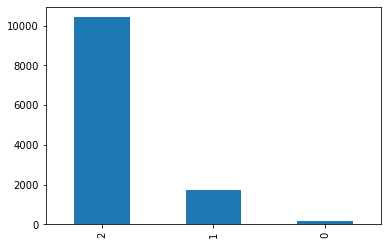

In [100]:
df['Accident_severity'].value_counts().plot(kind='bar')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age_band_of_driver           12316 non-null  object
 1   Sex_of_driver                12316 non-null  object
 2   Educational_level            12316 non-null  object
 3   Vehicle_driver_relation      12316 non-null  object
 4   Driving_experience           12316 non-null  object
 5   Lanes_or_Medians             12316 non-null  object
 6   Types_of_Junction            12316 non-null  object
 7   Road_surface_type            12316 non-null  object
 8   Road_surface_conditions      12316 non-null  object
 9   Light_conditions             12316 non-null  object
 10  Weather_conditions           12316 non-null  object
 11  Type_of_collision            12316 non-null  object
 12  Number_of_vehicles_involved  12316 non-null  int64 
 13  Number_of_casualties         12

In [102]:
df.corr()

,Number_of_vehicles_involved,Number_of_casualties,Accident_severity
Number_of_vehicles_involved,1.000000,0.213427,0.096023
Number_of_casualties,0.213427,1.000000,-0.045339
Accident_severity,0.096023,-0.045339,1.000000


In [4]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [5]:
df.groupby('Sex_of_driver').get_group('Unknown')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
26,18:36:00,Wednesday,18-30,Unknown,Junior high school,Employee,5-10yr,NaN,Owner,2-5yrs,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the left,Slight Injury
28,12:25:00,Tuesday,Over 51,Unknown,NaN,Unknown,NaN,NaN,NaN,NaN,...,Going straight,Driver or rider,Male,31-50,3,NaN,NaN,Not a Pedestrian,No priority to pedestrian,Slight Injury
33,15:25:00,Thursday,31-50,Unknown,Junior high school,Employee,2-5yr,Automobile,Governmental,NaN,...,Turnover,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
55,11:38:00,Saturday,18-30,Unknown,Junior high school,Employee,5-10yr,Automobile,Owner,5-10yrs,...,Going straight,Passenger,Female,18-30,3,Employee,Normal,Not a Pedestrian,Overtaking,Slight Injury
58,12:39:00,Tuesday,18-30,Unknown,Junior high school,Employee,Above 10yr,Automobile,Governmental,Above 10yr,...,Going straight,na,na,na,na,Employee,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10649,17:21:00,Thursday,31-50,Unknown,Junior high school,Owner,5-10yr,Public (12 seats),NaN,NaN,...,Reversing,Pedestrian,Female,18-30,2,NaN,NaN,Not a Pedestrian,Changing lane to the left,Slight Injury
10787,12:53:00,Sunday,18-30,Unknown,Junior high school,Employee,2-5yr,Public (13?45 seats),Governmental,1-2yr,...,Going straight,Driver or rider,Male,31-50,3,Self-employed,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
10852,13:10:00,Saturday,Unknown,Unknown,NaN,NaN,NaN,Automobile,Owner,Above 10yr,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Unknown or other,No distancing,Slight Injury
11121,18:45:00,Tuesday,18-30,Unknown,Elementary school,Employee,2-5yr,Automobile,NaN,NaN,...,Going straight,Pedestrian,Male,31-50,3,NaN,NaN,Unknown or other,Overtaking,Slight Injury


In [6]:
d_new=df.replace('Unknown',np.nan)

In [7]:
d_new.groupby('Sex_of_driver').get_group('Unknown')

KeyError: 'Unknown'

In [8]:
d_new

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,NaN,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
